/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


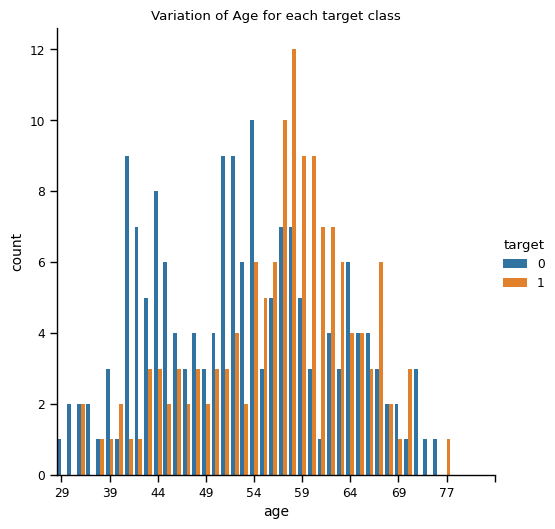

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['ca'] = df.ca.fillna(df.ca.mean())
df['thal'] = df.thal.fillna(df.thal.mean())
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

#distribution of target vs age
sns.set_context("paper",font_scale =1, rc ={"font.size":3, "axis.titlesize":15, "axes.labelsize":10})
ax = sns.catplot(kind ="count",data = df, x ="age", hue ="target", order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0,50,5))
plt.title("Variation of Age for each target class")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


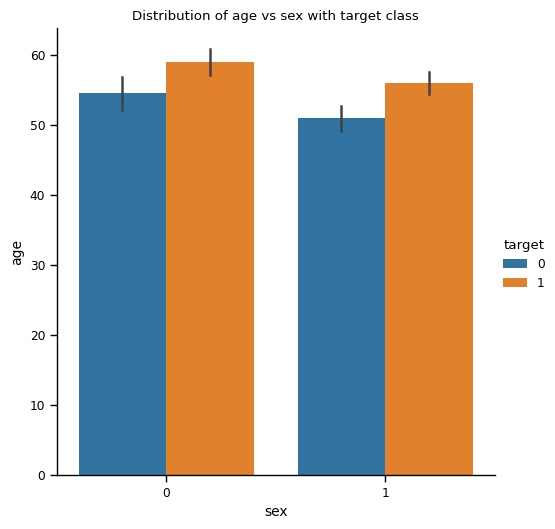

In [8]:
sns.catplot(kind ="bar",data = df, y ="age", x ="sex", hue = "target")
plt.title("Distribution of age vs sex with target class")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn_clasifier = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size =30,p=2,metric='minkowski')
knn_clasifier.fit(X_train, y_train)
y_pred = knn_clasifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = knn_clasifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for KNeigborsClassifier = {}'.format(accuary_for_train))
print('Accuracy for test set for KNeigborsClassifier = {}'.format(accuary_for_test))



Accuracy for training set for KNeigborsClassifier = 0.76
Accuracy for test set for KNeigborsClassifier = 0.69


In [14]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 42)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = svc_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuary_for_train))
print('Accuracy for test set for SVC = {}'.format(accuary_for_test))



Accuracy for training set for SVC=0.66
Accuracy for test set for SVC=0.67


In [17]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = nb_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for NBC = {}'.format(accuary_for_train))
print('Accuracy for test set for NBC = {}'.format(accuary_for_test))



Accuracy for training set for NBC = 0.85
Accuracy for test set for NBC = 0.84


In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth =10, min_samples_split=2,random_state = 42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = dt_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for DT = {}'.format(accuary_for_train))
print('Accuracy for test set for DT = {}'.format(accuary_for_test))



Accuracy for training set for DT = 1.0
Accuracy for test set for DT = 0.75


In [22]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators =10, criterion = 'gini', max_depth =10, min_samples_split =2,random_state = 42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = rf_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for RF = {}'.format(accuary_for_train))
print('Accuracy for test set for RF = {}'.format(accuary_for_test))





Accuracy for training set for RF = 0.98
Accuracy for test set for RF = 0.8


In [23]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=1)
ada_classifier.fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = ada_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for ADA = {}'.format(accuary_for_train))
print('Accuracy for test set for ADA = {}'.format(accuary_for_test))



Accuracy for training set for ADA = 0.91
Accuracy for test set for ADA = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [25]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,min_samples_split=2,subsample=1)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = gb_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for GB = {}'.format(accuary_for_train))
print('Accuracy for test set for GB = {}'.format(accuary_for_test))


Accuracy for training set for GB = 1.0
Accuracy for test set for GB = 0.85


In [27]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, objective='binary:logistic')
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = xgb_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for XGB = {}'.format(accuary_for_train))
print('Accuracy for test set for XGB = {}'.format(accuary_for_test))


Accuracy for training set for XGB = 1.0
Accuracy for test set for XGB = 0.87


In [31]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(kernel='rbf',random_state=42)

clf =[('dtc',dtc),('rfc',rfc),('ada',ada),('gb',gb),('xgb',xgb),('knn',knn),('svc',svc)]
from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
sc_classifier = StackingClassifier(estimators=clf,final_estimator=xg)
sc_classifier.fit(X_train,y_train)
y_pred = sc_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
y_pred_train = sc_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

accuary_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuary_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print('Accuracy for training set for Stacking = {}'.format(accuary_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuary_for_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.9
